# **Análisis exploratorio de datos** (`EDA`)

## Importamos librerías y cargamos los archivos de entrada

In [1]:

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [2]:

#pip install seaborn --upgrade

In [3]:
import seaborn as sns
print(sns.__version__)

0.13.2


### Data _`Accidentes`_

In [4]:
accidentes = pd.read_excel('Datasets/accidentes.xlsx')

In [5]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24481 entries, 0 to 24480
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_HECHO           24481 non-null  object        
 1   N_VICTIMAS         24481 non-null  int64         
 2   FECHA              24481 non-null  datetime64[ns]
 3   HORA               24471 non-null  float64       
 4   TIPO_DE_CALLE      13436 non-null  object        
 5   COMUNA             23024 non-null  float64       
 6   XY (CABA)          23215 non-null  object        
 7   LONGITUD           22998 non-null  float64       
 8   LATITUD            22998 non-null  float64       
 9   VEHICULO_VICTIMA   13739 non-null  object        
 10  VEHICULO_ACUSADO   9170 non-null   object        
 11  GRAVEDAD           24481 non-null  object        
 12  CARATULA_POLICIAL  24481 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory 

In [6]:
accidentes['TIPO_DE_CALLE'].isnull().sum() 
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24481 entries, 0 to 24480
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_HECHO           24481 non-null  object        
 1   N_VICTIMAS         24481 non-null  int64         
 2   FECHA              24481 non-null  datetime64[ns]
 3   HORA               24471 non-null  float64       
 4   TIPO_DE_CALLE      13436 non-null  object        
 5   COMUNA             23024 non-null  float64       
 6   XY (CABA)          23215 non-null  object        
 7   LONGITUD           22998 non-null  float64       
 8   LATITUD            22998 non-null  float64       
 9   VEHICULO_VICTIMA   13739 non-null  object        
 10  VEHICULO_ACUSADO   9170 non-null   object        
 11  GRAVEDAD           24481 non-null  object        
 12  CARATULA_POLICIAL  24481 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory 

#### Cambiamos el tipo de dato de las columnas para poder trabajar con ellas

In [7]:
# Procedemos a convertir el contenido de la columna HORA a tipo de datos int
accidentes['HORA'] = accidentes['HORA'].fillna(0).astype('int')

# Igualmente con el contenido de TIPO DE CALLE, COMUNA, VEHICULO_VICTIMA y VEHICULO ACUSADO a tipo category
accidentes['TIPO_DE_CALLE'] = accidentes['TIPO_DE_CALLE'].astype('category')
accidentes['COMUNA'] = accidentes['COMUNA'].astype('category')
accidentes['VEHICULO_VICTIMA'] = accidentes['VEHICULO_VICTIMA'].astype('category')
accidentes['VEHICULO_ACUSADO'] = accidentes['VEHICULO_ACUSADO'].astype('category')

# Tambien convertimos el contenido de la columna FECHA a tipo de dato datetime
accidentes['FECHA'] = accidentes['FECHA'].astype('datetime64[ns]')
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24481 entries, 0 to 24480
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_HECHO           24481 non-null  object        
 1   N_VICTIMAS         24481 non-null  int64         
 2   FECHA              24481 non-null  datetime64[ns]
 3   HORA               24481 non-null  int32         
 4   TIPO_DE_CALLE      13436 non-null  category      
 5   COMUNA             23024 non-null  category      
 6   XY (CABA)          23215 non-null  object        
 7   LONGITUD           22998 non-null  float64       
 8   LATITUD            22998 non-null  float64       
 9   VEHICULO_VICTIMA   13739 non-null  category      
 10  VEHICULO_ACUSADO   9170 non-null   category      
 11  GRAVEDAD           24481 non-null  object        
 12  CARATULA_POLICIAL  24481 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int32(1), int6

In [8]:
accidentes['TIPO_DE_CALLE'].value_counts()

AVENIDA      7807
CALLE        5519
AUTOPISTA     110
Name: TIPO_DE_CALLE, dtype: int64

#### Grafico de las variables

In [9]:
# Procedemos a definir las columnas que utilizaremos para el analisis
columnas1 = ["TIPO_DE_CALLE","COMUNA","VEHICULO_VICTIMA","VEHICULO_ACUSADO","N_VICTIMAS"]

#### Graficamos la distribucion de las columnas

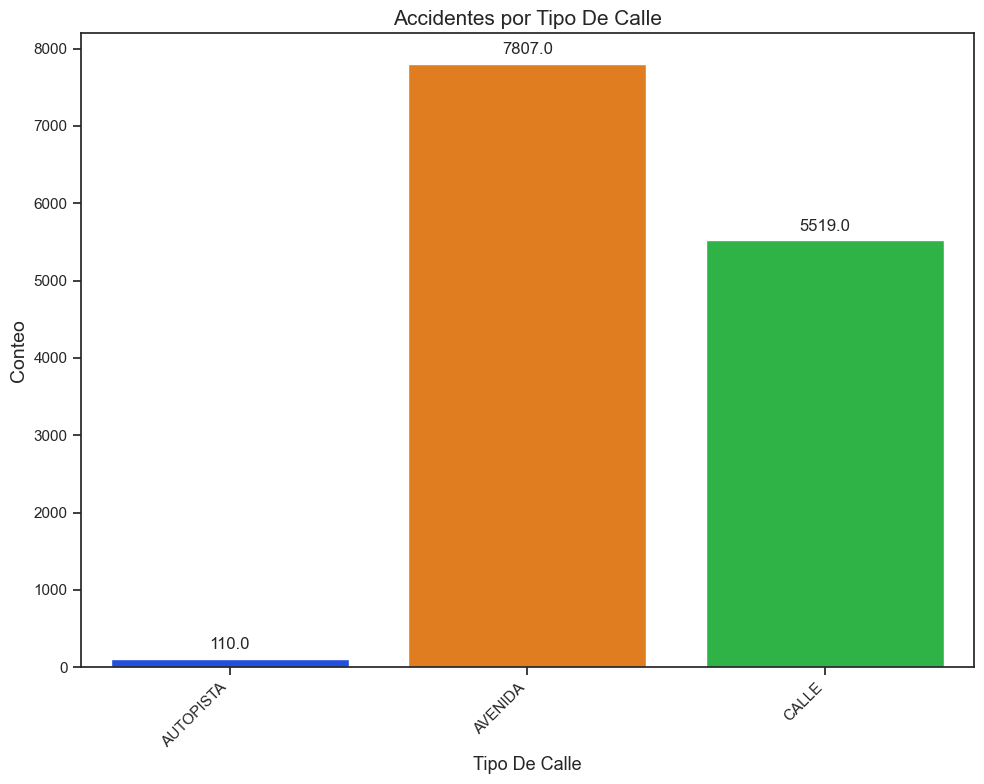

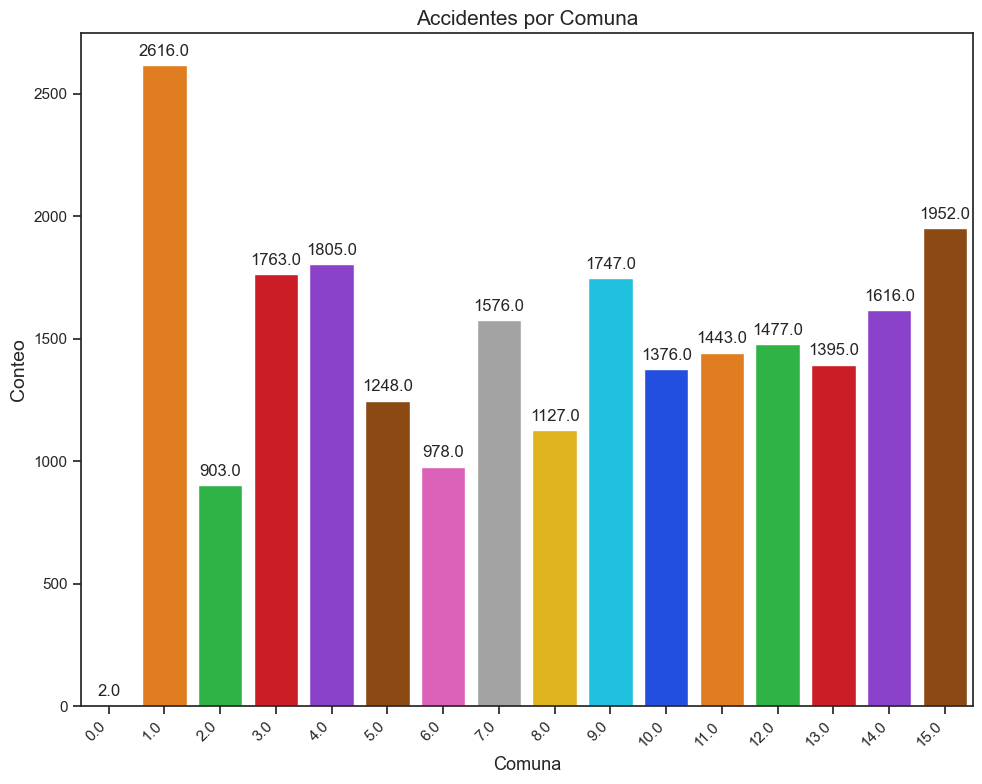

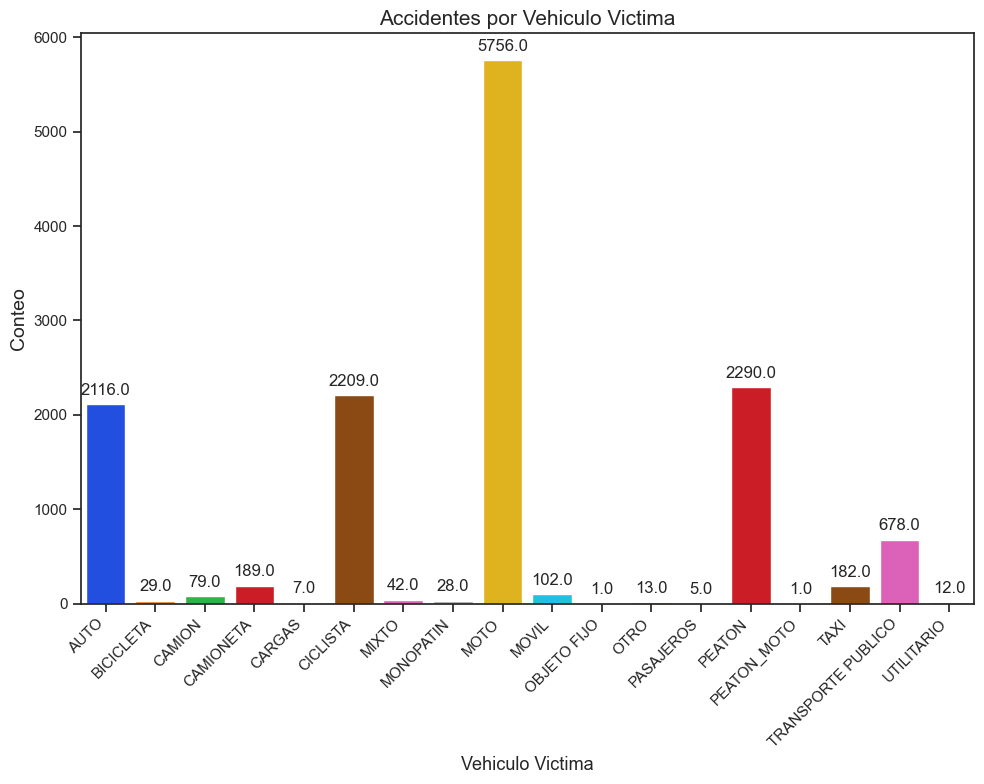

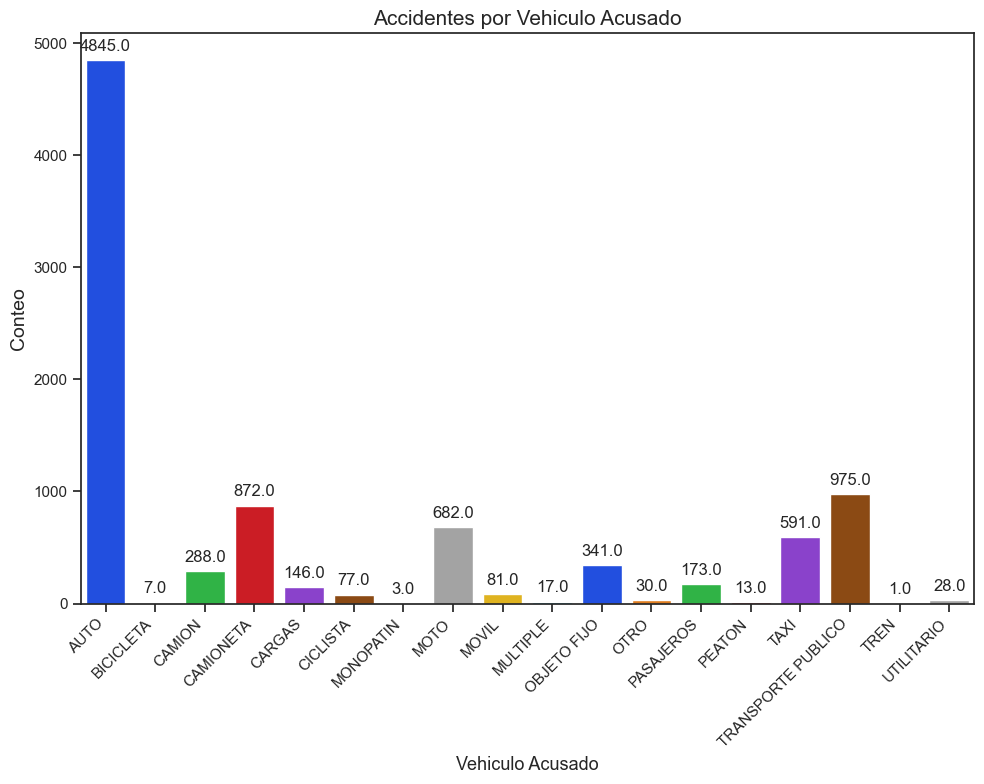

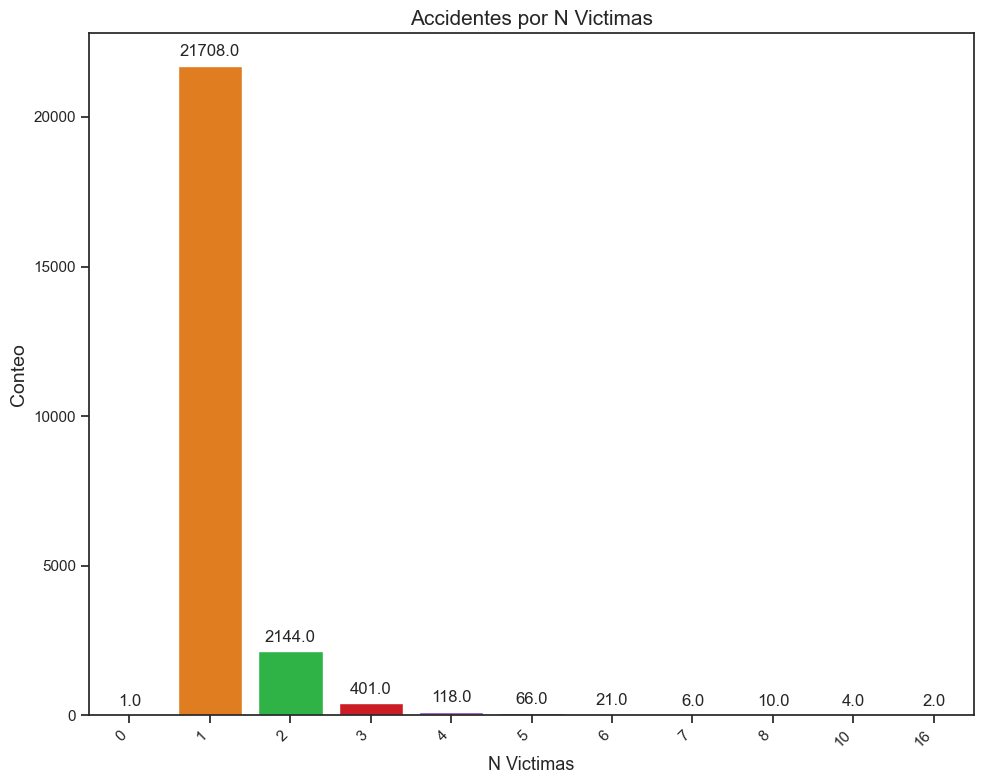

In [31]:
# Configuración de estilo de Seaborn para una apariencia más elegante
sns.set(style="ticks")

# Iteramos sobre las columnas y creamos un gráfico para cada una
for col in columnas1:
    # Creamos una figura y ejes
    fig, ax = plt.subplots(figsize=(10, 8))

    # Utilizamos Seaborn para mejorar el estilo del gráfico de barras
    
    sns.countplot(x=col, data=accidentes, palette="bright", hue=col , legend=False)
 

    # Configuramos título y etiquetas
    # Personalizamos el título para que refleje la información deseada
    plt.title("Accidentes por " + col.replace("_", " ").title(), fontsize=15)
    plt.xlabel(col.replace("_", " ").title(), fontsize=13)
    plt.ylabel("Conteo", fontsize=14)

    # Añadimos etiquetas a las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Ajustamos el diseño para una mejor legibilidad
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

### Creamos subplots de la fecha, año, mes, dia

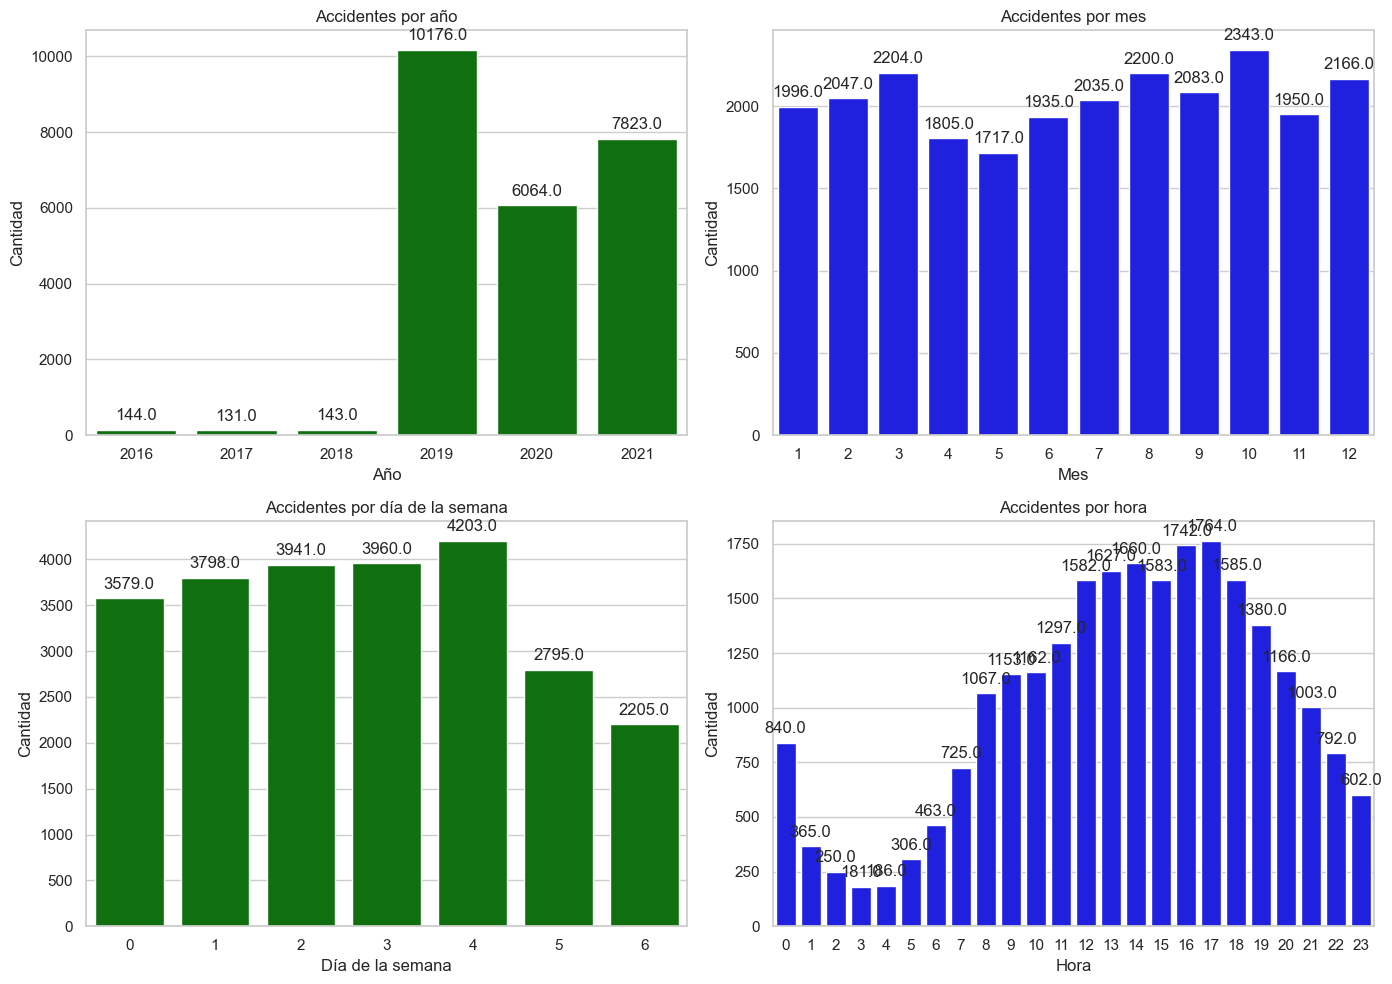

In [11]:
# Estilo más elegante de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico con subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1: Count plot para los años de la columna FECHA
sns.countplot(x=accidentes['FECHA'].dt.year, color="green", ax=axes[0, 0])
axes[0, 0].set_title('Accidentes por año')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Cantidad')

# Subplot 2: Count plot para los meses de la columna FECHA
sns.countplot(x=accidentes['FECHA'].dt.month, color="blue", ax=axes[0, 1])
axes[0, 1].set_title('Accidentes por mes')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Cantidad')

# Subplot 3: Count plot para los días de la semana de la columna FECHA
sns.countplot(x=accidentes['FECHA'].dt.dayofweek, color="green", ax=axes[1, 0])
axes[1, 0].set_title('Accidentes por día de la semana')
axes[1, 0].set_xlabel('Día de la semana')
axes[1, 0].set_ylabel('Cantidad')

# Subplot 4: Count plot para las horas de la columna HORA
sns.countplot(x=accidentes['HORA'], color="blue", ax=axes[1, 1])
axes[1, 1].set_title('Accidentes por hora')
axes[1, 1].set_xlabel('Hora')
axes[1, 1].set_ylabel('Cantidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Añadir etiquetas a las barras en todos los subplots
for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostrar el gráfico
plt.show()

### Data _`Víctimas`_

In [12]:
victimas = pd.read_excel('Datasets/victimas.xlsx')

In [13]:
# Procedemos a Convertir el contenido de ROL_VICTIMA, SEXO_VICTIMA y RANGO_ETARIO a tipo de datos category
victimas['ROL_VICTIMA'] = victimas['ROL_VICTIMA'].astype('category')
victimas['SEXO_VICTIMA'] = victimas['SEXO_VICTIMA'].astype('category')
victimas['RANGO_ETARIO'] = victimas['RANGO_ETARIO'].astype('category')

# Tambien Convertimos el contenido de la columna FECHA a a tipo de dato datetime
victimas['FECHA'] = victimas['FECHA'].astype('datetime64[ns]')

In [14]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          28322 non-null  object        
 1   FECHA             28322 non-null  datetime64[ns]
 2   ROL_VICTIMA       706 non-null    category      
 3   VEHICULO_VICTIMA  12041 non-null  object        
 4   SEXO_VICTIMA      26088 non-null  category      
 5   EDAD_VICTIMA      23798 non-null  float64       
 6   GRAVEDAD          28322 non-null  object        
 7   RANGO_ETARIO      23798 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), object(3)
memory usage: 1.2+ MB


In [15]:
# Listamos las columnas que vamos a utilizar
columnas2 = ["ROL_VICTIMA", "SEXO_VICTIMA", "RANGO_ETARIO", "VEHICULO_VICTIMA"]

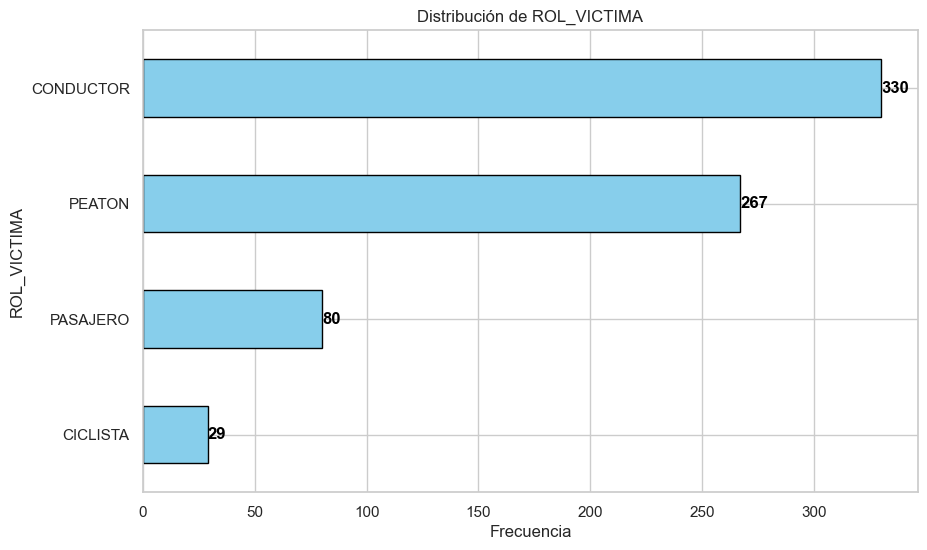

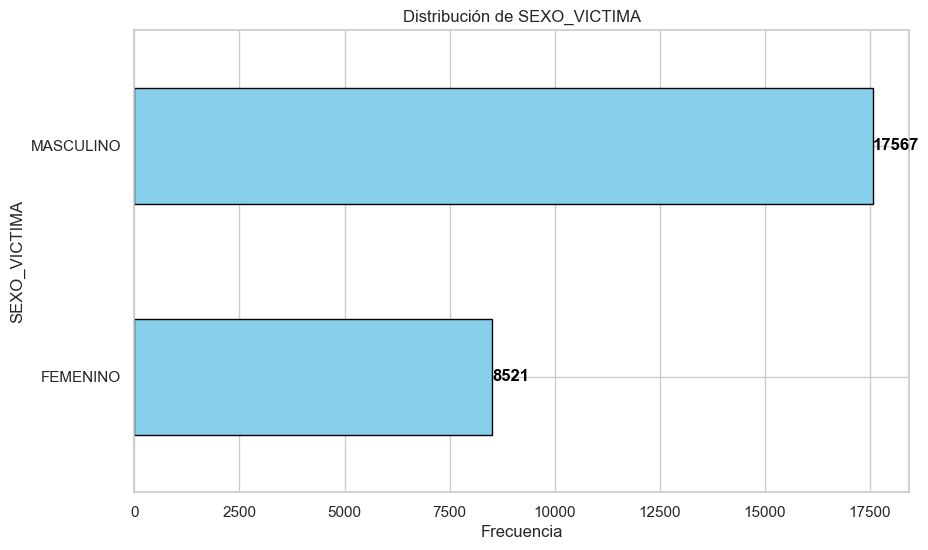

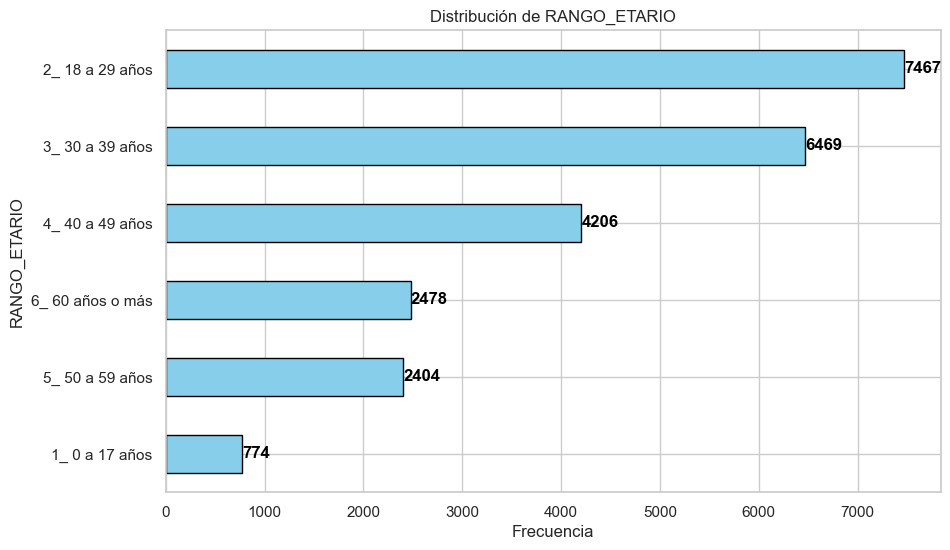

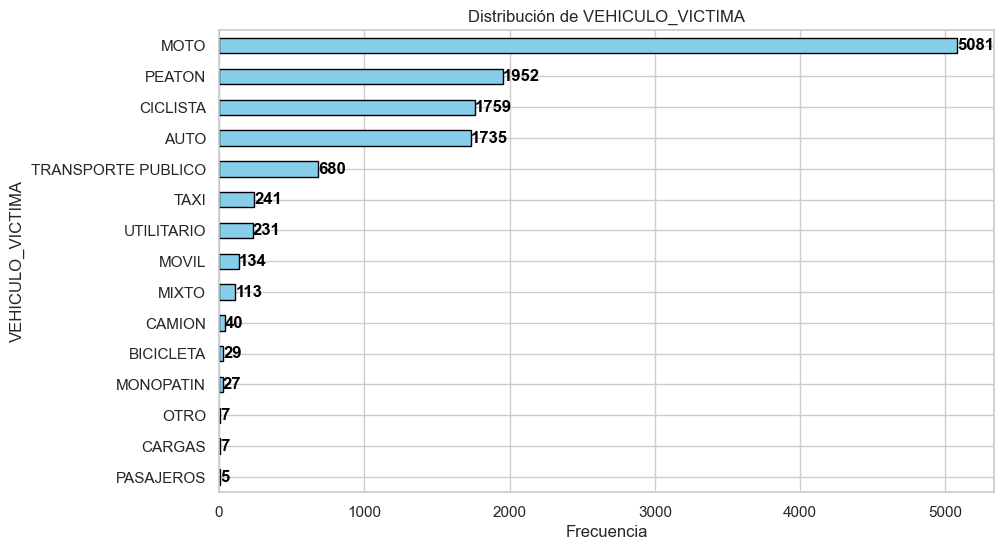

In [16]:
# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams['font.size'] = 12

# Iteración sobre las columnas
for col in columnas2:
    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Obtener frecuencias de los datos categóricos
    frecuencias = victimas[col].value_counts()
    
    # Crear gráfico de barras horizontal
    frecuencias.sort_values().plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)
    
    # Configurar título y etiquetas
    ax.set_title("Distribución de " + str(col))
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel(str(col))
    
    # Añadir etiquetas a las barras
    for i, v in enumerate(frecuencias.sort_values()):
        ax.text(v + 0.1, i, str(v), va='center', color='black', fontweight='bold')
    
    # Mostrar el gráfico
    plt.show()

## **Observaciones:** 
#### - La mayor cantidad de accidentes se dan en la comuna 1 ya que es un área de alto tránsito vehicular por contar con zonas turísticas y de oficinas.
#### - Las Avenidas son las vías con mayor cantidad de siniestros viales.
#### - Se nota un crecimiento del número de accidentes entre el horario de ingreso y salida de los trabajos.
#### - La mayor cantidad de accidentes son entre autos (autor) y motos (víctima).
#### - El rango de edad con mayor cantidad de accidentes es entre 19 y 39 años.
#### - Los hombres son los que más accidentes tienen.